In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df_pre = pd.read_csv('LiterallyWikidata/files_needed/train_attri_data_minmax.csv')
df_val = pd.read_csv('LiterallyWikidata/files_needed/valid_attri_data_minmax.csv')
df_test = pd.read_csv('LiterallyWikidata/files_needed/test_attri_data_minmax.csv')

In [59]:
len(df_pre)+len(df_val),len(df_pre["e"].unique())+len(df_val["e"].unique())
all = pd.concat([df_pre,df_val,df_test])
len(all["e"].unique())

47939

In [58]:
all

,e,a,v,name_e,name_a,ent_type,minmax,mean_predictor
0,Q593336,P625_Latitude,4.315194e+01,Poumarous,coordinate location(latitude),Q484170,7.397330e-01,4.124310e+01
1,Q511127,P625_Longtiude,3.301111e+00,Nant,coordinate location(logtitude),Q484170,5.068894e-01,1.396224e+00
2,Q59293,P1332_Latitude,4.329426e+01,Porto Sant'Elpidio,coordinates of northernmost point,Q747074,6.482318e-01,4.263261e+01
3,Q100092,P1082,6.460000e+03,San Cesario sul Panaro,population,Q747074,1.551299e-06,1.013151e+06
4,Q111736,P2046,1.768000e+07,Sarezzo,area,Q747074,2.903120e-12,3.535795e+14
...,...,...,...,...,...,...,...,...
29626,Q55049,P2046,6.070000e+06,Luogosano,area,Q747074,9.967159e-11,NaN
29627,Q6926115,P1332_Latitude,3.478270e+01,Mousere,NaN,Q29414133,5.730356e+01,NaN
29628,Q503111,P2046,5.122200e+08,Herrljunga Municipality,area,Q127448,8.410837e-09,NaN
29629,Q697916,P625_Latitude,5.258333e+01,Lake Tegel,coordinate location(latitude),Q23397,7.921296e+01,NaN


In [45]:
print(f'triple number of df48: {len(df_pre)}+{len(df_val)}=, num of df48_entity: {len(df_pre["e"].unique())}, num of df48_attribute: {len(df_pre["a"].unique())}')

triple number of df48: 237046+29631=len(df_pre)+len(df_val), num of df48_entity: 46982, num of df48_attribute: 86


In [9]:
# date_idx = df_pre[df_pre['name_a']=='date of death'].index
# df_pre.loc[date_idx,'name_a']='year of death'
date_idx = df_pre[df_pre['name_a']=='date of birth'].index
df_pre.loc[date_idx,'name_a']='year of birth'

In [10]:
df_pre[df_pre['name_a']=='year of birth']

,e,a,v,name_e,name_a,ent_type,minmax
14,Q17403332,P569,1995.0,Scott Davies,year of birth,Q5,0.997512
30,Q2620809,P569,1949.0,Damir Šolman,year of birth,Q5,0.974627
44,Q455669,P569,1933.0,Yevgeny Khrunov,year of birth,Q5,0.966667
49,Q151034,P569,1987.0,Kevin-Prince Boateng,year of birth,Q5,0.993532
73,Q1463146,P569,1953.0,Dan Roundfield,year of birth,Q5,0.976617
...,...,...,...,...,...,...,...
237009,Q94081,P569,1903.0,Bob Hope,year of birth,Q5,0.951741
237024,Q878291,P569,1815.0,Howell Cobb,year of birth,Q5,0.907960
237033,Q728288,P569,1974.0,Javier Otxoa,year of birth,Q5,0.987065
237036,Q7345814,P569,1928.0,Robert Irwin,year of birth,Q5,0.964179


In [11]:
#把nan名字部分補對
attri_idmap={}
with open('LiterallyWikidata/Attributes/attribute_labels_en.txt',encoding="utf-8") as f:
    for line in f:
        k, v = line.strip().split('\t')
        attri_idmap[k.strip()] = v.strip()
attri_idmap['P625_Latitude']='coordinate location(latitude)'
attri_idmap['P625_Longtiude']='coordinate location(logtitude)'
attri_idmap['P1332_Longtiude']='coordinates of northernmost point'
attri_idmap['P1332_Latitude']='coordinates of northernmost point'
attri_idmap['P1333_Longtiude']='coordinates of southernmost point'
attri_idmap['P1333_Latitude']='coordinates of southernmost point'
attri_idmap['P1334_Longtiude']='coordinates of easternmost point'
attri_idmap['P1334_Latitude']='coordinates of easternmost point'
attri_idmap['P1335_Longtiude']='coordinates of westernmost point'
attri_idmap['P1335_Latitude']='coordinates of westernmost point'
attri_idmap['P5140_Longtiude']='coordinates of geographic center(logtitude)'
attri_idmap['P5140_Latitude']='coordinates of geographic center(latitude)'
#df48.loc[:,'name_e']=df48['e'].map(entity_idmap)
df_pre.loc[:,'name_a']=df_pre['a'].map(attri_idmap)
df_val.loc[:,'name_a']=df_val['a'].map(attri_idmap)
df_test.loc[:,'name_a']=df_test['a'].map(attri_idmap)

In [12]:
#錯誤值，val的scale還是有誤
df_val.minmax.describe()
df_val[df_val['minmax'] == df_val['minmax'].min()]
# df_val.loc[1242,'v'] = 2006.0

,e,a,v,name_e,name_a,ent_type,minmax
23233,Q51,P1332_Latitude,-63.213306,Antarctica,coordinates of northernmost point,Q82794,-0.292719


In [13]:
df_val[df_val['minmax'] == df_val['minmax'].min()]
df_pre[df_pre['name_a'] == 'nominal GDP per capita']
#p1332[df_val[df_val['a'] == 'P1332_Latitude'].v<0]

,e,a,v,name_e,name_a,ent_type,minmax
466,Q790,P2132,765.0,Haiti,nominal GDP per capita,Q6256,0.008463
1079,Q21203,P2132,25655.0,Aruba,nominal GDP per capita,Q5164076,0.298867
1184,Q8646,P2132,46193.0,Hong Kong,nominal GDP per capita,Q779415,0.538493
2084,Q228,P2132,39146.0,Andorra,nominal GDP per capita,Q3624078,0.456272
2325,Q702,P2132,3187.0,Federated States of Micronesia,nominal GDP per capita,Q6256,0.036722
...,...,...,...,...,...,...,...
223390,Q739,P2132,6408.0,Colombia,nominal GDP per capita,Q859563,0.074303
223873,Q334,P2132,57714.0,Singapore,nominal GDP per capita,Q902814,0.672914
227811,Q1014,P2132,694.0,Liberia,nominal GDP per capita,Q7270,0.007635
228404,Q766,P2132,5114.0,Jamaica,nominal GDP per capita,Q918240,0.059205


In [14]:
df_val.minmax.describe()

count    29631.000000
mean         0.437729
std          0.379339
min         -0.292719
25%          0.001157
50%          0.526237
75%          0.750985
max          1.959790
Name: minmax, dtype: float64

In [15]:
#df_val.to_csv('LiterallyWikidata/files_needed/valid_attri_data_minmax.csv',index=False)
#df_test.to_csv('LiterallyWikidata/files_needed/test_attri_data_minmax.csv',index=False)

In [16]:
df_pre.minmax.describe()
df_pre.describe()

,v,minmax
count,2.370460e+05,237046.000000
mean,8.394835e+24,0.437273
std,4.084325e+27,0.379142
min,-9.600000e+02,0.000000
25%,1.520700e+01,0.001179
50%,7.000000e+01,0.525812
75%,1.976000e+03,0.750741
max,1.988550e+30,1.000000


In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#changing val scale
def v_scale(attdf):
    scaler = MinMaxScaler()
    scaler.fit(attdf.v.to_numpy().reshape(-1,1))
    return scaler
alist=list(df_val['a'].unique())
for a_name in alist:
    attdf = df_pre[df_pre["a"]==a_name]
    attdf['minmax']= v_scale(df_pre[df_pre["a"]==a_name]).transform(attdf.v.to_numpy().reshape(-1,1))
    df_pre.loc[attdf.index,'minmax']=attdf['minmax']
#     attdf_train = df_pre[df_pre["a"]==a_name]
#     attdf_train['minmax']= v_scale(df_pre[df_pre["a"]==a_name]).transform(attdf_train.v.to_numpy().reshape(-1,1))
#     df_pre.loc[attdf_train.index,'minmax']=attdf_train['minmax']

/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to 

/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to 

/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to 

/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to 

In [18]:
from sklearn.model_selection import train_test_split
train_attri_data, valid_attri_data = train_test_split(attri_data_ori, test_size=0.2,stratify=attri_data_ori['a'],random_state=802)
valid_attri_data, test_attri_data = train_test_split(valid_attri_data, test_size=0.5,stratify=valid_attri_data['a'],random_state=802)

NameError: name 'attri_data_ori' is not defined

In [ ]:
df=df_pre

In [ ]:
plt.xlabel('Latitude')
plt.ylabel('Counts')
df[df['name_a']=='coordinate location(latitude)'].v. hist()

In [ ]:
plt.xlabel('Logtitude')
plt.ylabel('Counts')
df[df['name_a']=='coordinate location(logtitude)'].v. hist()

In [ ]:
df_pre

In [36]:
import pandas as pd
import numpy as np
import pickle

#path =  "/projekte/tcl/tclext/kgc_chu/"

df_eav = df_pre.iloc[:,[0,1,2]]

ent2idx = {v:k for k,v in enumerate(df_pre['e'].unique())}
att2idx = {v:k for k,v in enumerate(df_pre["a"].unique())}

# Resulting file
num_lit = np.zeros([len(ent2idx), len(att2idx)], dtype=np.float32)

# Create literal wrt vocab
for i, (s, p, lit) in enumerate(df_eav.values):
    num_lit[ent2idx[s], att2idx[p]] = lit
        

print(num_lit)
    #np.save('{}_numerical_literals.npy'.format(data), num_lit)
# num_lit shape (47998, 291)

# num_lit = numeric_literal_array('LiterallyWikidata/files_needed/numeric_literals_ver06', ent2idx, att2idx)
print(num_lit.shape)
# np.save('LiterallyWikidata/files_needed/num_lit.npy',num_lit)

[[43.151943    0.21194445  0.         ...  0.          0.
   0.        ]
 [44.021946    3.3011112   0.         ...  0.          0.
   0.        ]
 [43.25864     0.         43.294262   ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
(46982, 86)


In [22]:
num_lit_= pd.DataFrame(num_lit)
num_lit_.columns=list(att2idx.keys())

In [ ]:
num_lit_

In [ ]:
import seaborn as sns

corr = num_lit_.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
num_lit_.columns[corr['P2031'].abs()>0.1]

# 用新表觀察12變數的相關

In [19]:
var_name=["population","GDP (PPP)","PPP GDP per capita",
      "year of birth","year of death",
      "area","work period (start)","work period (end)",
      "coordinate location(latitude)","coordinate location(logtitude)","height"]
list_var = ['P1082','P4010','P2299','P569','P570','P2046','P2031','P2032','P625_Latitude','P625_Longtiude','P2048']
#attri_idmap={}
# with open('Attributes/attribute_labels_en.txt',encoding="utf-8") as f:
#     for line in f:
#         k, v = line.strip().split('\t')
#         attri_idmap[k.strip()] = v.strip()

In [20]:
var_df= num_lit_.loc[:,list_var]
var_df.columns=var_name

NameError: name 'num_lit_' is not defined

In [ ]:
import seaborn as sns

corr = var_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
var_df.columns[corr['population'].abs()>0.1]

In [ ]:
var_df.columns[corr['area'].abs()>0.1]

# 找constraint
## unary: 經緯度
### longtitude:180/-180  latitude: 90/-90

In [ ]:
a_group = df_pre.groupby('name_a')
def get_group_v(a_name):
    return a_group.get_group(a_name).v

In [ ]:
get_group_v('height').describe()

In [ ]:
print(var_name)
print(list_var)

# death-birth>0

In [37]:
d_b = num_lit_[(num_lit_["P570"]!=0) & (num_lit_["P569"]!=0)]

In [38]:
d_b = d_b.loc[:,['P569','P570']]
d_b['d-b']=d_b['P570']-d_b['P569']
d_b[d_b.P569<0]
d_b[d_b['d-b']<0]
d_b['d-b'].describe()

count    3188.000000
mean       69.903389
std        16.739353
min         3.000000
25%        60.000000
50%        73.000000
75%        82.000000
max       110.000000
Name: d-b, dtype: float64

In [ ]:
#d_b[d_b['d-b']==d_b['d-b'].min()]
#d_b[d_b['d-b']==d_b['d-b'].max()]
#idx2ent = {k:v for k,v in enumerate(df_pre['e'].unique())}
# idx2ent[37768]
# idx2ent[4460]
# idx2ent[44993]
# idx2ent[5628]

In [ ]:
df_pre[df_pre['e']=='Q183332']
#df_pre.iloc[181021,2]=255.0
df_pre.iloc[181021]
# df_pre[df_pre['e']=='Q128267']
# df_pre[df_pre['e']=='Q43982']
# df_pre[df_pre['e']=='Q42887']
# df_pre.iloc[6084]


# pop/area 

In [23]:
den = num_lit_[num_lit_['P2046']!=0]

In [24]:
den = den.loc[:,['P1082','P2046']]
den["range"]=den['P1082']/den['P2046']

In [28]:
den.describe()

,P1082,P2046,range
count,1.740100e+04,1.740100e+04,17401.000000
mean,7.344089e+05,3.535793e+14,0.000799
std,3.257852e+07,4.616913e+16,0.018146
min,0.000000e+00,4.097400e-02,0.000000
25%,1.020000e+02,1.477000e+07,0.000002
50%,2.347000e+03,4.153000e+07,0.000047
75%,2.336100e+04,4.205700e+08,0.000223
max,4.164252e+09,6.090000e+18,1.578673


# gdp gdp_per pop


In [41]:
gdppop=num_lit_[(num_lit_["P2299"]!=0) & (num_lit_["P1082"]!=0)]
gdppop=gdppop.loc[:,['P2299','P1082']]
gdppop['m']=gdppop['P2299']*gdppop['P1082']
gdppop['m'].describe()

count    9.500000e+01
mean     3.628371e+11
std      1.170519e+12
min      2.052867e+08
25%      1.947750e+10
50%      4.431235e+10
75%      1.848897e+11
max      9.503051e+12
Name: m, dtype: float64

# work end> work start

In [185]:
work_range= num_lit_[(num_lit_["P2032"]!=0) & (num_lit_["P2031"]!=0)]

In [186]:
work_range=work_range.loc[:,['P2031','P2032']]
work_range['r']=work_range['P2032']-work_range['P2031']
work_range['r'].describe()

count    2097.000000
mean       17.506914
std        12.632737
min         1.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        86.000000
Name: r, dtype: float64

In [188]:
work_range[work_range['r']==work_range['r'].min()]
# df_pre[df_pre['e']==idx2ent[12527]]
# df_pre.iloc[100568,2]=1959.0
# # df_pre.iloc[220871]

,P2031,P2032,r
150,1946.0,1947.0,1.0
2018,1953.0,1954.0,1.0
3164,1948.0,1949.0,1.0
3653,1967.0,1968.0,1.0
3823,2010.0,2011.0,1.0
4754,1948.0,1949.0,1.0
6790,1948.0,1949.0,1.0
7999,1951.0,1952.0,1.0
9282,1967.0,1968.0,1.0
10620,1948.0,1949.0,1.0


In [148]:
df_pre.to_csv('LiterallyWikidata/files_needed/train_attri_data_minmax.csv',index=False)

In [38]:
for i in var_name:
    print(i, get_group_v(i).describe())

population count    1.715700e+04
mean     1.013151e+06
std      3.466321e+07
min      0.000000e+00
25%      1.231000e+03
50%      6.515000e+03
75%      4.381600e+04
max      4.164252e+09
Name: v, dtype: float64
GDP (PPP) count    1.250000e+02
mean     4.389851e+11
std      1.698107e+12
min      4.402120e+07
25%      7.584701e+09
50%      3.979443e+10
75%      1.953400e+11
max      1.539088e+13
Name: v, dtype: float64
PPP GDP per capita count       124.000000
mean      20586.915589
std       24895.688674
min         727.486000
25%        4010.629500
50%       10717.054500
75%       27085.655250
max      128646.760000
Name: v, dtype: float64
date of birth count    12746.000000
mean      1936.366939
std        114.664273
min        -10.000000
25%       1934.000000
50%       1964.000000
75%       1980.000000
max       2000.000000
Name: v, dtype: float64
date of death count    4039.000000
mean     1924.454568
std       205.750340
min        32.000000
25%      1931.000000
50%      1988.00000

In [20]:
id2ent = {}
with open('LiterallyWikidata/Entities/entity_labels_en.txt',encoding="utf-8") as f:
    for line in f:
        k, v = line.strip().split('\t')
        id2ent[k.strip()] = v.strip()

# height

Text(0, 0.5, 'counts')

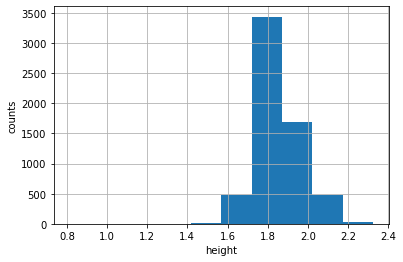

In [191]:
df_h = df_pre[(df_pre['a']=='P2048')&(df_pre['ent_type']=='Q5')]
df_h.v.describe()
df_h.v.hist()
plt.xlabel('height')
plt.ylabel('counts')
#df_h[df_h['v']==0.81]

In [ ]:
df[df['e']=='Q145']

In [29]:
df_rel[df_rel['e']=='Q9682']
id2ent['Q145']

'United Kingdom'

# mean predictor

In [63]:
df=df_val

In [64]:
#meanpredictor
att_group = df.groupby('a')
df['mean_predictor'] = att_group['v'].transform('mean')

In [65]:
df

,e,a,v,name_e,name_a,ent_type,minmax,mean_predictor
0,Q3376,P1334_Latitude,4.606556e+01,Trento,coordinates of easternmost point,Q747074,6.978149e-01,4.280884e+01
1,Q170446,P1082,1.094284e+06,Sumy Oblast,population,Q3348196,2.627804e-04,9.241346e+05
2,Q908156,P625_Latitude,3.821420e+01,Namboku Line,coordinate location(latitude),Q15079663,7.123011e-01,4.108496e+01
3,Q423,P1332_Longtiude,1.299300e+02,North Korea,coordinates of northernmost point,Q6256,8.688086e-01,1.096314e+01
4,Q611033,P2048,1.730000e+00,José Antonio Castro,height,Q5,1.694772e-04,3.842972e+00
...,...,...,...,...,...,...,...,...
29626,Q1754,P571,1.187000e+03,Stockholm,inception,Q707813,7.204698e-01,1.863500e+03
29627,Q531135,P2067,7.000000e+01,Richard Witschge,mass,Q5,3.519147e-29,1.571268e+18
29628,Q1689057,P6546,2.680000e+02,Jim Campbell,penalty minutes in career,Q5,6.701940e-02,3.994132e+02
29629,Q46246,P2046,1.227000e+07,Cazzano di Tramigna,area,Q747074,2.014778e-12,7.337821e+11


In [29]:
df['mean_predictor'] 

KeyError: 'mean_predictor'

In [67]:
df['mae']=abs(df['mean_predictor'] - df['v'])

In [66]:
abs(df['mean_predictor'] - df['v']).mean()

9.440756815206814e+16

In [71]:
df['mae'].describe()

count    2.963100e+04
mean     9.440757e+16
std      8.128101e+18
min      2.749244e-04
25%      3.138801e+00
50%      2.371949e+01
75%      3.787195e+02
max      1.398429e+21
Name: mae, dtype: float64

In [81]:
list_var=['P625_Longtiude','P625_Latitude','P2048','P569','P570','P2031','P2032','P2046','P1082','P2299','P4010']
var_name=['population', 'GDP (PPP)', 'PPP GDP per capita', 'date of birth', 'date of death', 'area', 'work period (start)', 'work period (end)', 'coordinate location(latitude)', 'coordinate location(logtitude)', 'height']

In [72]:
att_pred = df.groupby('a')['mae'].aggregate(['mean','median'])

In [82]:
var_res = df[df['name_a'].isin(var_name)]

In [83]:
var_res.groupby('name_a')['mae'].aggregate(['mean'])

,mean
name_a,
GDP (PPP),2.267770e+12
PPP GDP per capita,1.519208e+04
area,1.451149e+12
coordinate location(latitude),7.389367e+00
coordinate location(logtitude),3.907755e+01
date of birth,4.904635e+01
date of death,8.991507e+01
height,3.960182e+00
population,1.653915e+06


In [32]:
# train set mean
df = df_pre
att_group = df.groupby('a')
df['mean_predictor'] = att_group['v'].transform('mean')

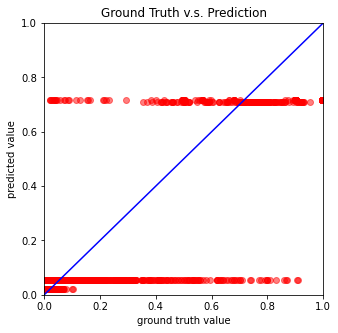

In [62]:
from matplotlib.pyplot import figure
df2=df
lim=1
preds=df2['mean_predictor']
targets=df2['v']
figure(figsize=(5, 5))
plt.scatter(targets, preds, c='r', alpha=0.5)
plt.plot([0, lim], [0, lim], c='b')
plt.xlim(0, lim)
plt.ylim(0, lim)
plt.xlabel('ground truth value')
plt.ylabel('predicted value')
plt.title('Ground Truth v.s. Prediction')
plt.show()

In [35]:
df[df['a']=='P569'].mean_predictor
df[df['a']=='P570'].mean_predictor

33        1924.454568
160       1924.454568
166       1924.454568
301       1924.454568
428       1924.454568
             ...     
236745    1924.454568
236772    1924.454568
236837    1924.454568
236863    1924.454568
236930    1924.454568
Name: mean_predictor, Length: 4039, dtype: float64